In [15]:
%load_ext autoreload
%autoreload 2

In [16]:
%pylab inline
import numpy as np
import crossover
import selection

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
## Storing data for problem
n = 100
p = np.random.randint(5,8, size=n)
w = np.random.randint(10, 45, size=n)
C = 365

#Hyperparamets
p_c = 0.8
p_m = 0.1
k = 100
e = 5
num_iter = 100

convergence_curve = []

In [18]:
def compute_penalty(x):
    total_weight = np.dot(w, x)
    penalty = np.maximum(0, -C + total_weight)
    return penalty

def fitness(x):
    profit = np.dot(p, x)
    penalty = compute_penalty(x) # we apply a penalty for how much 
    #extra weight above capacity a solution incurs
    return profit - penalty

def mutate(x):
    point = np.random.randint(1, len(x))
    x[point] = 1 - x[point]
    return x

population = np.random.randint(0, 2, size=(k, n))
fitnesses = np.array([fitness(x) for x in population])
selector = selection.RouletteWheelSelector()

In [19]:
for i in range(num_iter):
    convergence_curve.append(max(fitnesses))
    new_population = selection.elitism(e, population, fitnesses)
    selector.prep_selector(fitnesses)
    while len(new_population) < k:
        parent1, parent2 = selector.select(population)
        perform_crossover = np.random.random() <= p_c
        if perform_crossover:
            child = crossover.single_point(parent1, parent2)
            perform_mutation = np.random.random() <= p_m
            if perform_mutation:
                child = mutate(child)
            new_population = np.append(new_population, [child], axis=0)
    population = new_population
    fitnesses = np.array([fitness(x) for x in population])

In [20]:
best = selection.elitism(1, population, fitnesses)[0]

In [21]:
best

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [22]:
fitness(best)

103

In [23]:
compute_penalty(best)

2

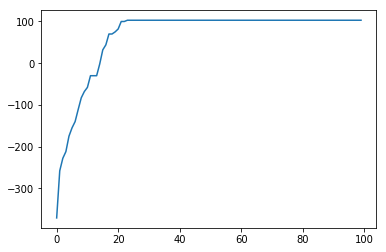

In [24]:
plot(list(range(len(convergence_curve))), convergence_curve)